In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
#Define the input
ip = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)

#We'll be using sinc() function to generate output
op = np.sinc(5*ip)

In [ ]:
# Convert np arr to tensors
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)

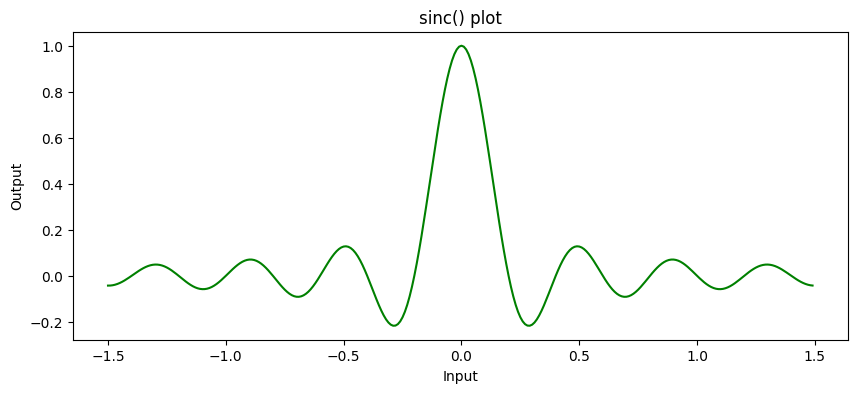

In [ ]:
# Graph for the function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "green")
plt.title('sinc() plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(1, 4)
        self.linear_2 = nn.Linear(4, 9)
        self.linear_3 = nn.Linear(9, 12)
        self.linear_4 = nn.Linear(12, 10)
        self.linear_5 = nn.Linear(10, 10)
        self.linear_6 = nn.Linear(10, 10)
        self.linear_7 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear_1(x))
        x = nn.functional.leaky_relu(self.linear_2(x))
        x = nn.functional.leaky_relu(self.linear_3(x))
        x = nn.functional.leaky_relu(self.linear_4(x))
        x = nn.functional.leaky_relu(self.linear_5(x))
        x = nn.functional.leaky_relu(self.linear_6(x))
        x = nn.functional.leaky_relu(self.linear_7(x))

        x = self.predict(x)
        return x

In [ ]:
model = Model()
total_params = sum(p.numel() for p in model.parameters())
print('Total params - ', total_params)

Total params -  572


In [ ]:

def train_model(model, x, y):
    epoch_size = 4000
    loss_arr = []
    epoch_arr = []
    grad_arr = []
    converged = False
    min_grad = 0
    loss_val=0
    print('Begining training')

    for epoch in range(epoch_size):
        if(converged):
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        lossm_val = 0.001
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        #Calculate the gradiet
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5

        grad_arr.append(grad_norm)

        total_params=sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epoch_size:
            print('Gradient norm reached minimum value')
            predicted_y = model(x)
            lossm=loss_func(predicted_y,y)
            H = torch.zeros((total_params, total_params))

            Jacob = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            Jacob = torch.cat([e.flatten() for e in Jacob]) # flatten
            for i in range(total_params):
                result = torch.autograd.grad(Jacob[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result]) # flatten
            # H_eig=torch.symeig(H).eigenvalues
            H_eig = torch.linalg.eigvalsh(H)
            positive_count=0
            for i in H_eig.tolist():
                if(i>0):
                    positive_count+=1
            minimal_ratio = positive_count/H.shape[0]
            print('Minimal Ratio - ',minimal_ratio, ' , Loss - ', lossm.data.detach().numpy(), ' Erpoch - ', epoch)
            lossm_val=lossm.data.detach().numpy()
            break


    print('Training Completed')
    return lossm_val,minimal_ratio

In [ ]:
loss_arr = []
min_ratio_arr = []
for index in range(100):
    print("Training model ", index)
    model = Model()
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

    loss_value, min_ratio = train_model(model, x, y)
    loss_arr.append(loss_value)
    min_ratio_arr.append(min_ratio)

Training model  0
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5052447552447552  , Loss -  0.061283257  Erpoch -  158
Training Completed
Training model  1
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5227272727272727  , Loss -  0.0053183166  Erpoch -  417
Training Completed
Training model  2
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5454545454545454  , Loss -  0.0012641081  Erpoch -  1137
Training Completed
Training model  3
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5052447552447552  , Loss -  0.06130125  Erpoch -  17
Training Completed
Training model  4
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5157342657342657  , Loss -  0.0045879325  Erpoch -  950
Training Completed
Training model  5
Begining training
Gradient norm reached minimum value
Minimal Ratio -  0.5314685314685315  , Loss -  0.002193249  Erpoch -  842
Training Completed
Training

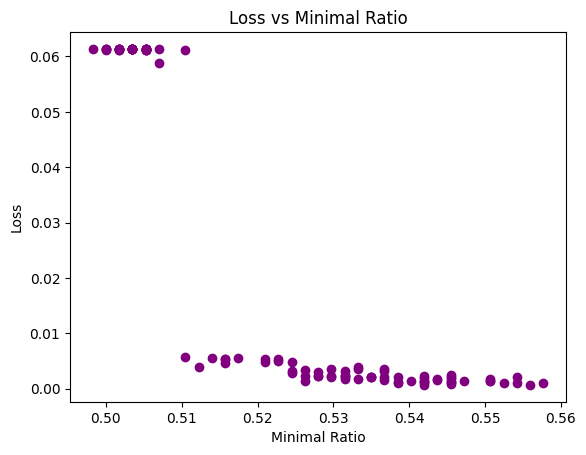

In [ ]:
plt.scatter(min_ratio_arr,loss_arr, color = "purple")
plt.title("Loss vs Minimal Ratio")
plt.xlabel("Minimal Ratio")
plt.ylabel("Loss")
plt.show()